<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

### <center> PAP Otoño 2020 | Optimización de Programas de Inversión en Intermediarios Financieros <center>
***

# <center> Sistema de Trading con Cobertura <center>

#### <center> Seminario de Investigación de Ingeniería Financiera <center>
***
##### <center> Autores: <center>
    
        I.F. Carlos Alfonso Barboza Espinoza       I.F. Israel Castillo Herrera
        I.F. Francisco Javier Enriquez Muñoz       I.F. Andrea Jiménez Orozco
        I.F. Erendida Marin Haro                   I.F. Alberto Enrique Nuño Guevara
        I.F. Esteban Ortiz-Tirado González         I.F. Jaime Eduardo Vázquez Guzmán
    
##### <center> En colaboración y supervisión de: <center>
    
        Mtro. Francisco Muñoz Elguezabal 

# Objetivo (1)
***


- El principal objetivo de un sistema de trading es maximizar sus beneficios utilizando señales y confirmaciones de tendencia que ayuden a mejorar el porcentaje de entradas y salidas apropiadas. 


- La fuente de estas señales proviene del desarrollo de un modelo de inteligencia artíficial basado en una red neuronal multicapa, cuyo entrenamiento utiliza datos diario de contratos futuros continuos.


- Para mejorar el desempeño del sistema se toma en cuenta un criterio de selección e importancia de variables, conocido como ingeniería de variables, así como una optimización de parámetros internos para el modelo. 



# Objetivo (2)
***
- Finalmente con el fin de disminuir la minusvalía de la posiciones abiertas, se propone la implementación de una cobertura dinámica utilizando opciones como una alternativa para preservar el capital y gestionar el riesgo. 


- El impacto de esta investigación va dirigida a contribuir e innovar el proceso de estrategias de inversión que realizan actualmente los fondos de pensión en México (Afores). Siendo el rendimiento un factor determinante para el retiro de futuras generaciones. En donde tomando en cuenta el contexto actual y recientes reformas en la materia, se ha convertido en una problemática de suma importancia hoy en día para nuestra sociedad. 

# <center> Temario <center>
***
1. Sistema de pensiones y Afores en México
2. Creación del conjunto de datos y diferenciación fraccional
3. Change point detection
4. Feature engineering y feature importance
5. Modelo de red neuronal multicapa y optimización de hiperparámetros
6. Cobertura dinámica

# Realción del sistema, cobertura y ramas
***

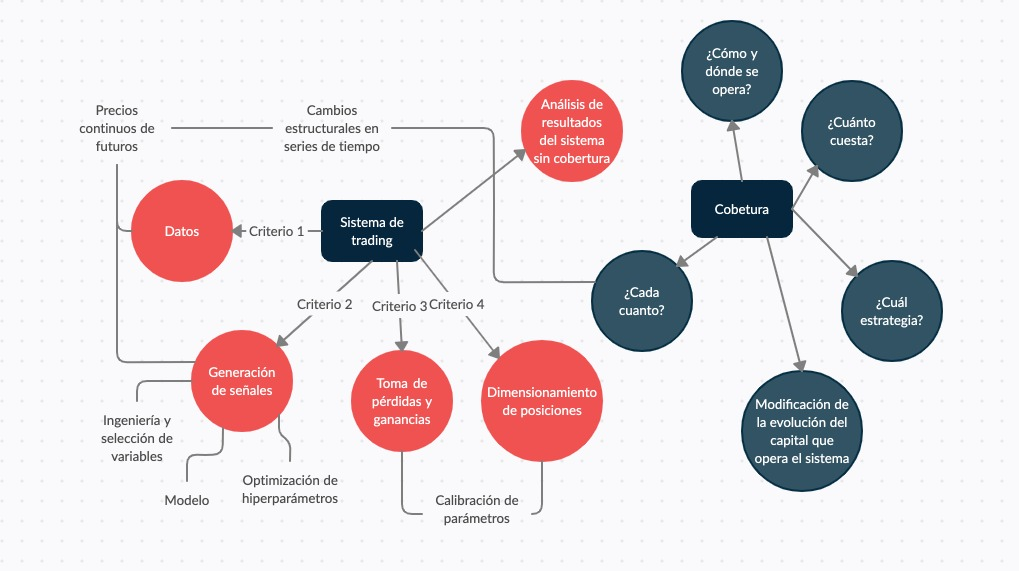

# <center> Sistema de Pensiones y Afores en México (1) <center>
***
- Consideramos las Afores para la implementación de un sistema de trading con modelos y cobertura, esperando tener un impacto positivo en el sistema de ahorro para el retiro en México.

    
- La tasa de reemplazo estimada para los trabajadores del periodo Afore se estima será del 30% 
    (Centro de Estudios Sociales y de Opinión Pública de la Cámara de Diputados)

In [10]:
# Importar .py para correr el notebook
import functions as fn
import pandas as pd

In [44]:
# Porcentaje de poblacion economicamente activa que cotiza en AFORE
df_pea = fn.f_leer_archivo("PEA.csv")
df_pea[0:8]

,Año,cotizantes,PEA,% de la PEA que cotiza en AFORE
0,2010.0,19703294.0,48478718.0,40.6
1,2011.0,20535771.0,50772496.0,40.4
2,2012.0,21469400.0,51317999.0,41.8
3,2013.0,22213577.0,52370886.0,42.4
4,2014.0,23114624.0,52108400.0,44.4
5,2015.0,24142279.0,53809017.0,44.9
6,2016.0,24903688.0,54034800.0,46.1
7,2017.0,25994436.0,54696638.0,47.5


In [12]:
df_flujos = fn.f_leer_archivo("Flujos.csv")
df_flujos = df_flujos.drop(["Recursos Canalizados a las Afores"], axis=1)

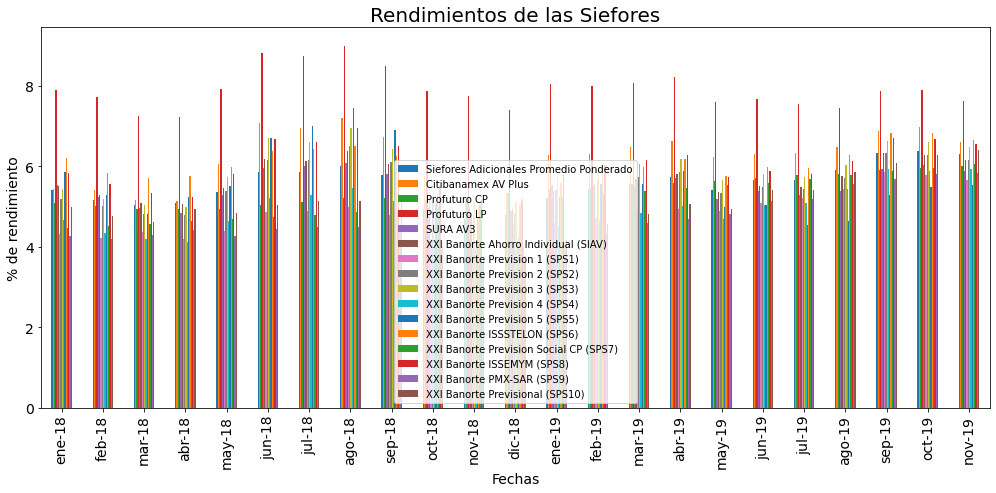

In [46]:
# Rendimiento de Siefores en %
df_rend = fn.f_leer_archivo("rend.csv")
fn.f_rendimiento_siefores(df_rend)

In [ ]:
# Rendimiento promedio ponderado
df_pond = df_rend.iloc[:, [0, 1]]
df_pond = pd.DataFrame(df_pond)

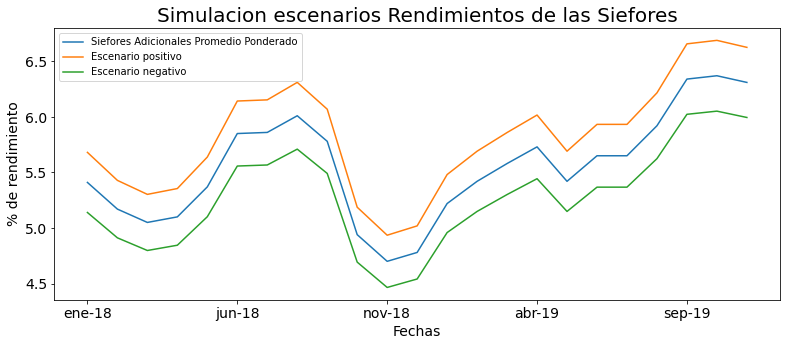

In [47]:
#  Primer simulación usando el promedio ponderado de los rend
fn.f_simulacion_prom_pond(df_pond, 0.05)

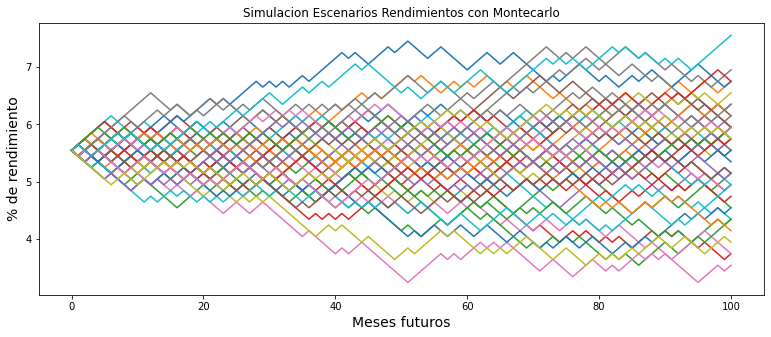

In [48]:
# Simulacion Montecarlo posibles escenarios
media = df_pond["Siefores Adicionales Promedio Ponderado"].mean()
fn.f_simulacion_montecarlo(100, 50, media)

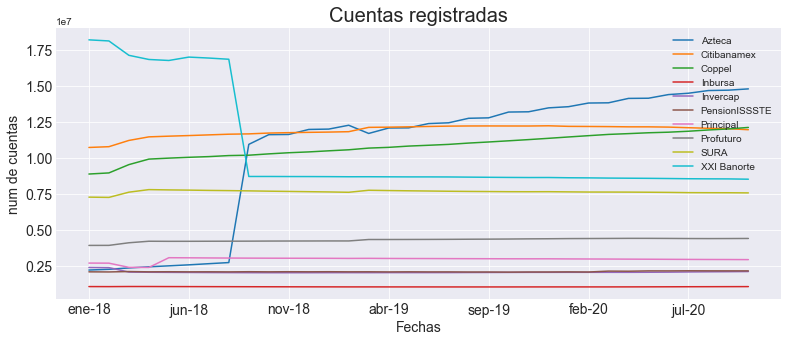

In [13]:
# Cuentas registradas por Afore (total)
df_cuentas_admn_afore = pd.read_csv("Cuentas.csv")
df_cuentas_admn_afore = df_cuentas_admn_afore.drop(["Total de Cuentas Administradas 1"], axis=1)
fn.f_cuentas_admn_afore(df_cuentas_admn_afore)

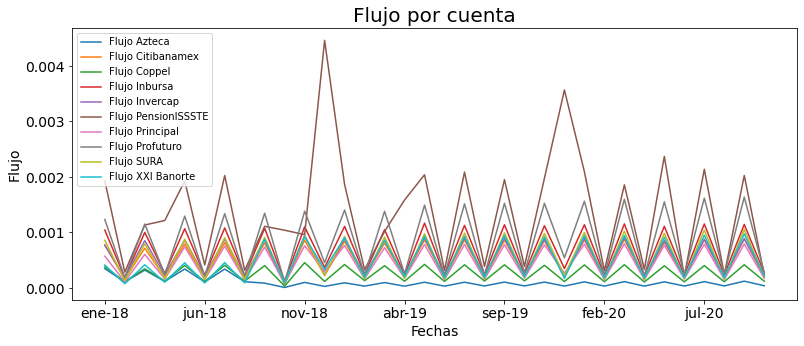

In [50]:
# Flujo por cuentas/ Desempeño de las Afores
fn.f_flujo_por_cuentas(df_flujos, df_cuentas_admn_afore)

***
Se toman los flujos y las cuentas para ver un ejemplo de forma individual para hacer una simulación de los posibles cambios en los flujos de las personas que tienen su Afore en una cuenta en específico.
***

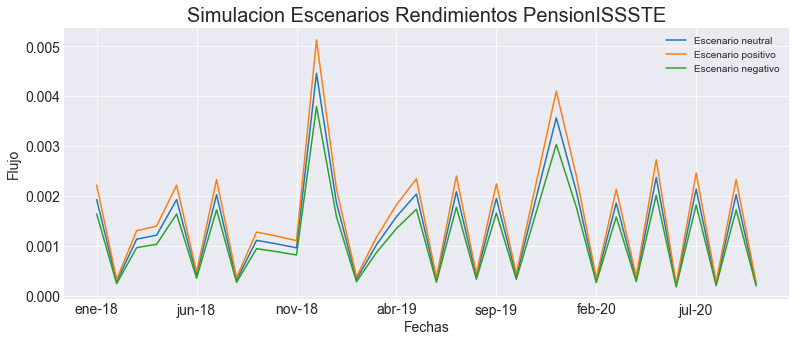

In [14]:
# Simulación aumento/disminución de los rendimientos en una cuenta
fn.f_simulacion_rendimiento(df_flujos, df_cuentas_admn_afore, "PensionISSSTE", 0.15)

Si se mantiene un aumento en los rendimientos de las Afores se podría mejorar la calidad de vida de casi 50% de la PEA que cotiza en Afore, mejorando así la calidad del retiro de las personas en México.

A continuación se presenta la propuesta de solución para modificar los resultados en las Afores esperando que haya una mejora sistemática.

# <center> Creación del Conjunto de Datos (2) <center>
***

El sistema de trading que estamos desarrollando requiere datos de los contratos de futuros **"E-mini Euro FX"** negociados en la plataforma electrónica CME Globex

Se consideraron dos opciones para obtener un histórico de las transacciones de este producto:

1. CME Datamine
2. FirstRate


- **FirstRate** nos provee una serie por minuto de datos continuos iniciando el 14 de diciembre de 2006 y finalizando el 30 de octubre de 2020. Además, entrega los datos de cada contrato empezando con el MEH08 (Contrato que venció en Marzo 2008).


- La serie de datos continuos es creada mediante la unión de los contratos con la fecha de vencimiento más cercana. El cambio de un contrato al siguiente, se realiza el último día de cotización del contrato que vence. A su vez, los precios son ajustados de acuerdo al diferencial en la fecha de cambio.

## <center> Conversión de Granularidad <center>
---

In [ ]:
import pandas as pd
from Sistema_Trading_Cubierto import data as dt

column_names = ["TimeStamp", "open", "high", "low", "close", "volume"]
df_raw = pd.read_csv('files/ME_2020.csv',
                      header=1,
                      names=column_names, 
                      parse_dates=["TimeStamp"],
                      index_col=["TimeStamp"])
df_daily = dt.load_data(start=2018, end=2020, freq='D')
df_hourly = dt.load_data(start=2018, end=2020, freq='H')


### <center> Datos Originales contra Datos Diarios (datos originales reagrupados)  <center>

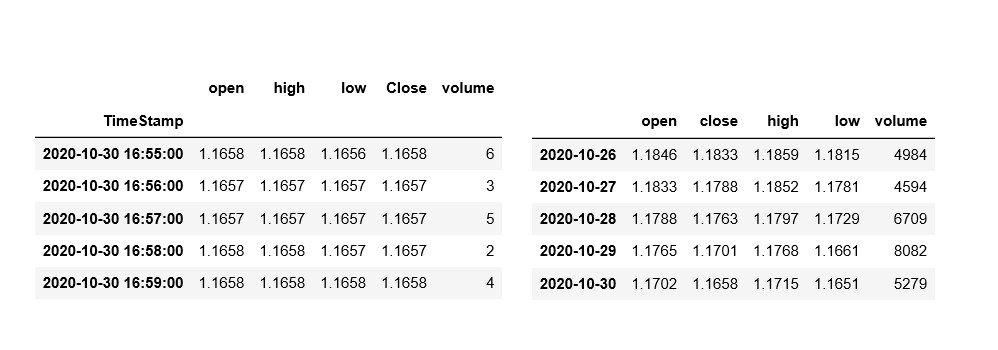

# <center> Diferenciación Fraccional </center>
---


- Una práctica común en ML es pre-procesar los datos para que la serie con la que se va a trabajar sea **estacionaria** (media y varianza constante)

<center>$R_{t} = ln(\frac{P_{t}}{P_{t-1}}) = ln(P_{t}) - ln(P_{t-1})$</center>

- Al diferenciar, se pierde casi por completo la **memoria** de la serie

    - Las series financieras tienen memoria, lo cual es importante considerar si lo que queremos es hacer predicciones sobre ella


- Si **ganamos estacionariedad perdemos memoria**, pero si conservamos memoria no tenemos estacionariedad
---
    
#### <center>¿Habrá una manera de diferenciar, tal que obtengamos una serie estacionaria y conservemos la memoria de la serie original?

## <center> Operador Rezago <center>

Aplicando una expansión mediante Serie de Taylor, al operador rezago  $B$ donde $B^{k}X_{t} = X_{t-k}$ obtenemos lo siguiente:

<center>$(1-B)^{d} = 1 - dB + \frac{d(d-1)}{2!}B^{2} - \frac{d(d-1)(d-2)}{3!}B^{3} + ...$
    
Donde $(1-B)^{d}$ es la **diferenciación** de una serie y $d$ representa el factor de diferenciación que estamos aplicando
    
<br/>

Por lo tanto, los **coeficientes** de cada $B^{n}$ se pueden expresar como

<center> $w_{k} = -w_{k-1}\frac{d-k+1}{k}$
    
Lo cual nos permite utilizar un numero entre $(0,1)$ para el grado de diferenciación $d$ 

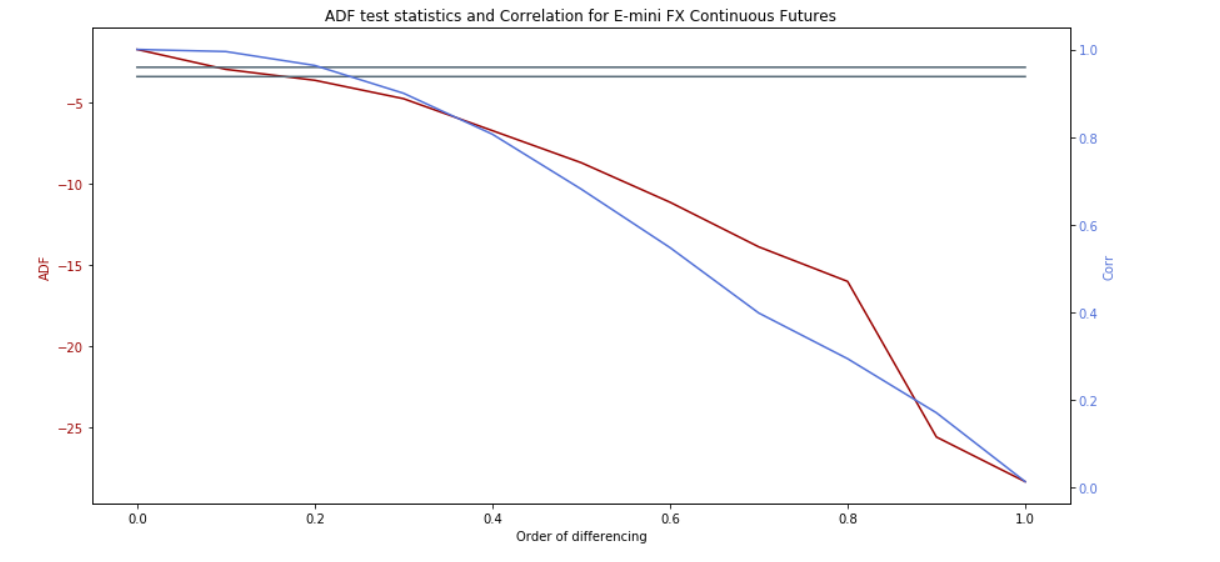

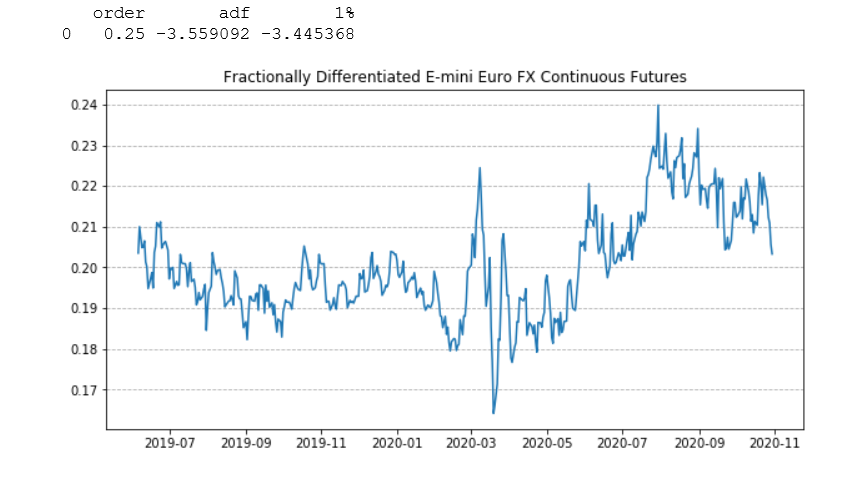

# <center> Change Point Detection (3) <center> 
---
<center>  Análisis estadistico, su función es detectar los puntos en donde el proceso estócastico o la serie de tiempo cambia.<center> 
    

- **Métodos**: Window, binary, PELT.

- **Resultado de los métodos**: Anomalías dentro de la serie de tiempo, fechas en donde ocurrió el cambio y lista de variables dummy, donde 1 es un change point y el 0 sin anomalía.

- **Entradas**: Dataframe que contenga una columna *close*.

- **Librería**: *ruptures* 

    
- **Window**: se utiliza para realizar una segmentación rápida de la señal. El algoritmo utiliza dos ventanas que se deslizan a lo largo del flujo de datos. Las propiedades estadísticas de las señales dentro de cada ventana se comparan con una medida de discrepancia.

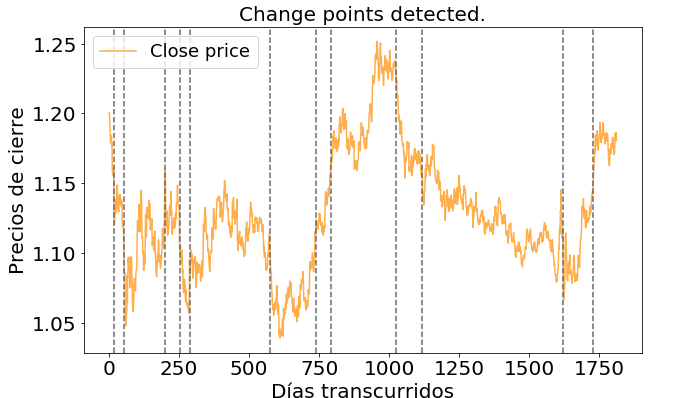


**Binary**: La segmentación binaria es el método estándar a lo relacionado a change point detection. Básicamente, aplica iterativamente el change point a diferentes subconjuntos de la secuencia y1….,yn con el objetivo de detectar múltiples puntos de cambio. 
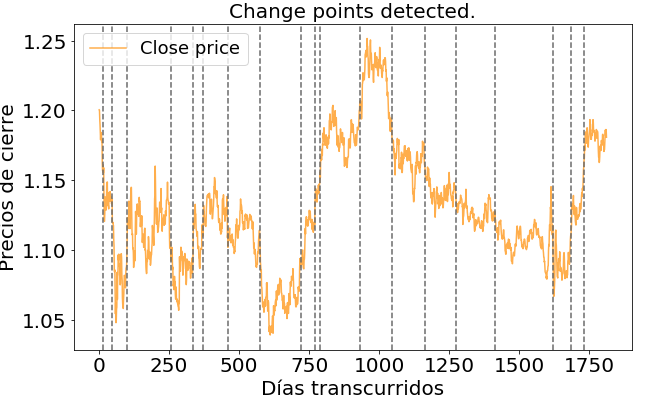

**PELT**: Es un método exacto y genera resultados rápidos y consistentes. Para tener una mayor potencia del método se necesitarán un número mayor de datos. Si un cambio es muy grande, existen mayores posibilidades de que el método encuentre ese punto exacto.
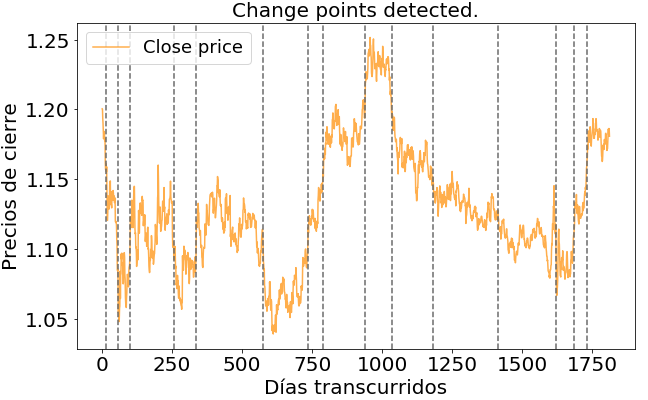

## <center>INGENIERÍA DE CARACTERÍSTICAS</center>

El proceso de *Ingeniería de Caraterísticas* se sustena en la generación de un conjunto de nuevas características diseñadas a partir de variables fuente (OHLC - Open, High, Low, Close). En este proyecto se utilizaron los siguientes bloques de transformaciones matemáticas: 

* **Dominio cuantitativo**: coseno,seno, exponente, raíces, exponenciales
* **Dominio financiero**: rendimientos, rendimientos acumulados, indicadores técnicos y financieros

## <center>Función convergente de Ingeniería de Características (4) </center>
***

In [ ]:
def add_all_features(df_pe):
    # Add fracdiff features
    df_pe = Add_features.add_fracdiff_features(df_pe, threshold = 1e-4)
    # Technical Indicators
    df_pe['CCI'] = Add_features.CCI(df_pe, 14) # Add CCI
    df_pe['SMA_5'] = Add_features.SMA(df_pe, 5)
    df_pe['SMA_10'] = Add_features.SMA(df_pe, 10)
    df_pe['MACD'] = Add_features.df_pe['SMA_10']-df_pe['SMA_5']
    df_pe['Upper_BB'], df_pe['Lower_BB'] = Add_features.BBANDS(df_pe, 10)
    df_pe['Range_BB'] = (df_pe['Close']-df_pe['Lower_BB'])/(df_pe['Upper_BB']-df_pe['Lower_BB'])
    df_pe['RSI'] = Add_features.RSI(df_pe, 10)
    df_pe['Max_range'] = Add_features.price_from_max(df_pe, 20)
    df_pe['Min_range'] = Add_features.price_from_min(df_pe, 20)
    df_pe['Price_Range'] = Add_features.price_range(df_pe, 50)
    df_pe['returna'], df_pe['returna_acums'], df_pe['returnlog'], df_pe['returnlog_acum'], df_pe['binary'] = Add_features.ret_div(df_pe)
    df_pe['zscore'] = Add_features.z_score(df_pe)
    df_pe['diff1'] , df_pe['diff2'] , df_pe['diff3'] , df_pe['diff4'] , df_pe['diff5'] = Add_features.int_diff(df_pe,np.arange(1,6))
    df_pe['mova1'] , df_pe['movaf2'] , df_pe['mova3'] , df_pe['mova4'] , df_pe['mova5'] = Add_features.mov_averages(df_pe,np.arange(1,6))
    df_pe['quartiles'] = Add_features.quartiles(df_pe,10)
    return df_pe

## <center>IMPORTANCIA DE VARIABLES</center>
*Feature Importance (FI)* de filtrado, como lo es el proceso de prueba de **Análisis de Varianza**, brinda una selección de importancia de variables, a partir de una perspectiva estadística, lo que permitirá involucrar aquellas variables que cumplan la regla del **p-value**, que serán las que nos brinden un aporte óptimo para la analítica predictiva que buscamos con ANN.  

### <center> Prueba ANOVA
    
> $H_0$: Las medias son iguales $\mu_1 = \mu_2 = \mu_3 = \mu_4 ... = \mu_n $ 

> $H_a$: Al menos una media es distinta de las demás

El proceso de eliminación tiene como objetivo reducir el tamaño del conjunto de características de entrada y, al mismo tiempo, retener la información discriminatoria de clase para problemas de clasificación.

In [ ]:
def ANOVA_importance(df,
                     sample:float,
                     VO:str):
    
    '''
    Return the index of the variables with the most
    statistical significance with p-value approach
    There is F statistical approach'''

    long = int(round(len(df) * sample))

    X = df.drop(VO, axis=1)
    y = df[VO]

    #select train and test data
    X_train , X_test , y_train , y_test = X.iloc[:long,:] , X.iloc[long:,:] , \
                                                y.iloc[:long], y.iloc[long:]

    #train model
    constant_filter = VarianceThreshold(threshold=0.01)
    constant_filter.fit(X_train)
    #print(constant_filter)
    X_train_filter = constant_filter.transform(X_train)
    X_test_filter = constant_filter.transform(X_test)

In [ ]:

    #transpose data
    X_train_T = pd.DataFrame(X_train_filter.T)
    X_test_T = pd.DataFrame(X_test_filter.T)
    
    #eliminate duplicated features
    duplicated_features = X_train_T.duplicated()
    
    #choose features to keep 
    features_to_keep = [not index for index in duplicated_features]
    X_train_unique = X_train_T[features_to_keep].T
    X_test_unique = X_test_T[features_to_keep].T
    #X_test_unique

    #ANOVA SECTION
    sel = f_classif(X_train_unique, y_train)
    
    #choose the p_values < 0.05
    p_values = pd.Series(sel[1])
    p_values.index = X_train_unique.columns
    #p_values.sort_values(ascending=True, inplace=True)
    p_values = p_values[p_values<0.05]

    #data_imp = df[df.index==p_values.index]
    #df.iloc[p_values.index]
    return df.iloc[:,p_values.index]

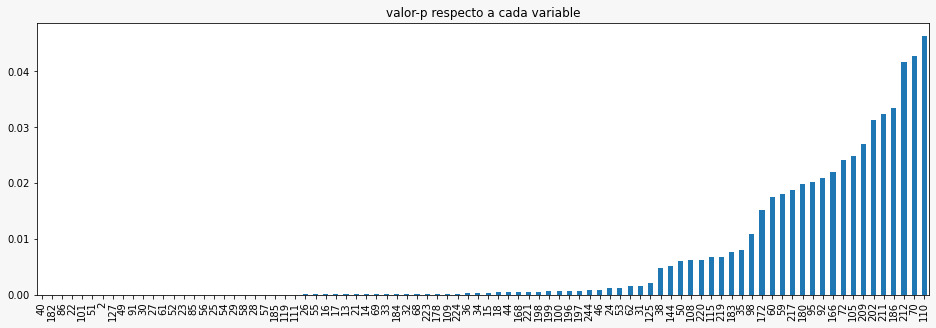

# <center> Modelo AI: Red Neuronal Multicapa (5) </center>
---

* Red neuronal multicapa con propagación hacia atrás.
* Resultado del modelo : 
  * 0 -> precio bajista.
  * 1 -> precio alcista.
 
* Entradas :
    * 35 variables resultantes del feature engineering y feature importance.
    * Ventana de tiempo para el entrenamiento del 01/01/2007 - 29/10/2018.
    

* Tipo de aprendizaje : **supervisado**.

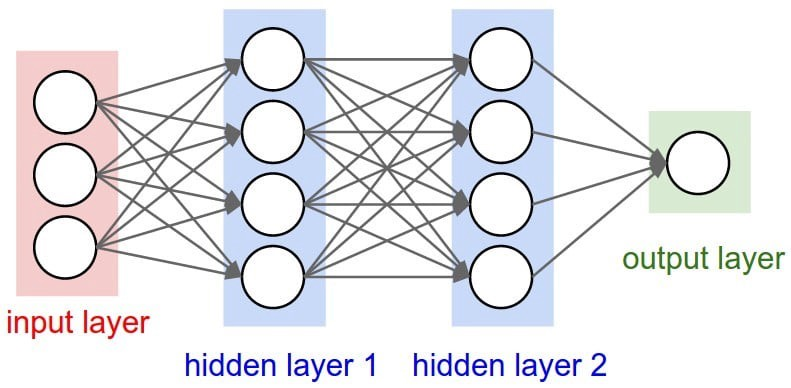

# Consideraciones para el modelo 

* Retropropagación. 

* Función de activación sigmoide, definida por :
$\sigma(x) = \frac{1}{1+e^{-x}}\$
 
<img src="Sigmoide.PNG" alt="Drawing" style="width: 330px" align='ceright'/>

* Función costo : entropía cruzada binaria  definida por :
$ H_p(q)= -\frac{1}{n}\sum_{i=1}^{N}y_i  log(p(y_i)) +(1-y_i) log(1-p(y_i)) $

## <center> Validación cruzada secuencial por bloques </center>

* Proceso implementado durante las pruebas del modelo.
* Periodos independientes de 30 días.
* Se busca evitar filtraciones a la variable objetivo.

In [1]:
def createNN(neuron_pctg,lr,layer_pctg,dropout):
    model = Sequential()
    nneurons = float(neuron_pctg) * 40  # número máximo de neuronas por capa
    nlayers = float(layer_pctg)*50 # número máximo de capas ocultas
    layer_counter = 0
    model.add(Dense(35,activation="sigmoid",input_shape=(34,)))  # capa de entrada
    while layer_counter < nlayers:  # límite de capas ocultas
        model.add(Dense(nneurons, activation="sigmoid")) #creación de cada con n neuronas
        model.add(Dropout(dropout))# implementación de dropout
        layer_counter += 1
    model.add(Dense(1,activation="sigmoid")) #capa de salida
    opt = keras.optimizers.Adam(learning_rate=lr)#implemetnación de tasa de aprendizaje
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=["accuracy"])
    return model

## <center> Optimización de Hiperparámetros <center>

*** 

* Atributos propios de la arquitectura del modelo.
* Los hiperparámetros tienen un efecto directo en la calidad del modelo.
* Hiperparámetros considerados hasta el momento : 
 * Tasa de aprendizaje.
 * Número de capas ocultas.
 * Neuronas por capa oculta.
 * Tamaño del lote.
 * Dropout.
* Método de optimización : PSO.  
* Resultado de la optimización : red neuronal entrenada con los hiperparámetros óptimos.

In [ ]:
param_dict ={
    'learning_rate': { #tasa de aprendizaje
                    'start':1000, #mínimo
                   'stop':10000, #máximo
                    'step':100,#tamaño de paso
                   'scale':10000, # número sobre el cual se dividirán los resultados del muestro aleatorio
                   },
    'neuron percentage': { ## neuronas por capa oculta
                    'start':10,
                    'stop': 100,
                    'step':1,
                    'scale':10
                            },
    'layer percentage':{ # número de capas ocultas
                    'start':10,
                    'stop':101,
                    'step':2,
                    'scale':10
                        },
    'batch size':{ #tamaño del lote con el que se entrenará el modelo
                'start':10,
                'stop':100,
                'step':5,
                'scale':1
                        },

        'dropout':{ # probabilidad con la que se quitarán neuronas de cada capa
                'start':0,
                'stop':50,
                'step':2,
                'scale':100

        }

}
model = OptimizationTools.optimizeNN(param_dict,25,15,x_train,y_train,epochs=10)   

In [ ]:
for i in range(0, iter): #iteraciones establecidas al llamar la función

    for j in range(0, n_particles):
        model = Models.createNN(lr=float(x1p["learning_rate"][j]), neuron_pctg=float(x1p["neuron percentage"][j])
                                ,layer_pctg=x1p["layer percentage"][j])
        csv_logger = CSVLogger('log' + str(j) + '.csv', append=False,
                               separator=';') #almacenamiento de funnción de costo en cada epoch
        model.fit(x_train, y_train, epochs=3, batch_size=1, verbose=1,
                  callbacks=[csv_logger], shuffle=False) #ajuste del modelo
        #lectura para comparación de resultados
        to_read = 'log' + str(j) + '.csv'
        fx = (pd.read_csv("C:/Users/anuno/OneDrive/Documents/ITESO/PAP 2/" + to_read,
                          sep=';', usecols=["loss"]))
        fx = fx.rename(columns={'loss': 'loss' + str(j)})

        if j == 0:
            history = fx
        else:

            history = pd.concat([history, fx], axis=1, sort=False)
    fx = pd.DataFrame(trainProcess_min(history))
    [val, idx] = fx.min(), fx.idxmin()[0] #selección de parámetros que minimizan f. costo

# Resultados del proceso de optimización y del entrenamiento.

* Los hiperparámetros óptimos encontrados fueron : 

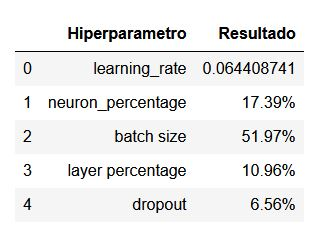

* Después del proceso de entrenamiento el modelo cuenta con un accuray del 52%

# <center> Cobertura Dinámica (6) </center>
---



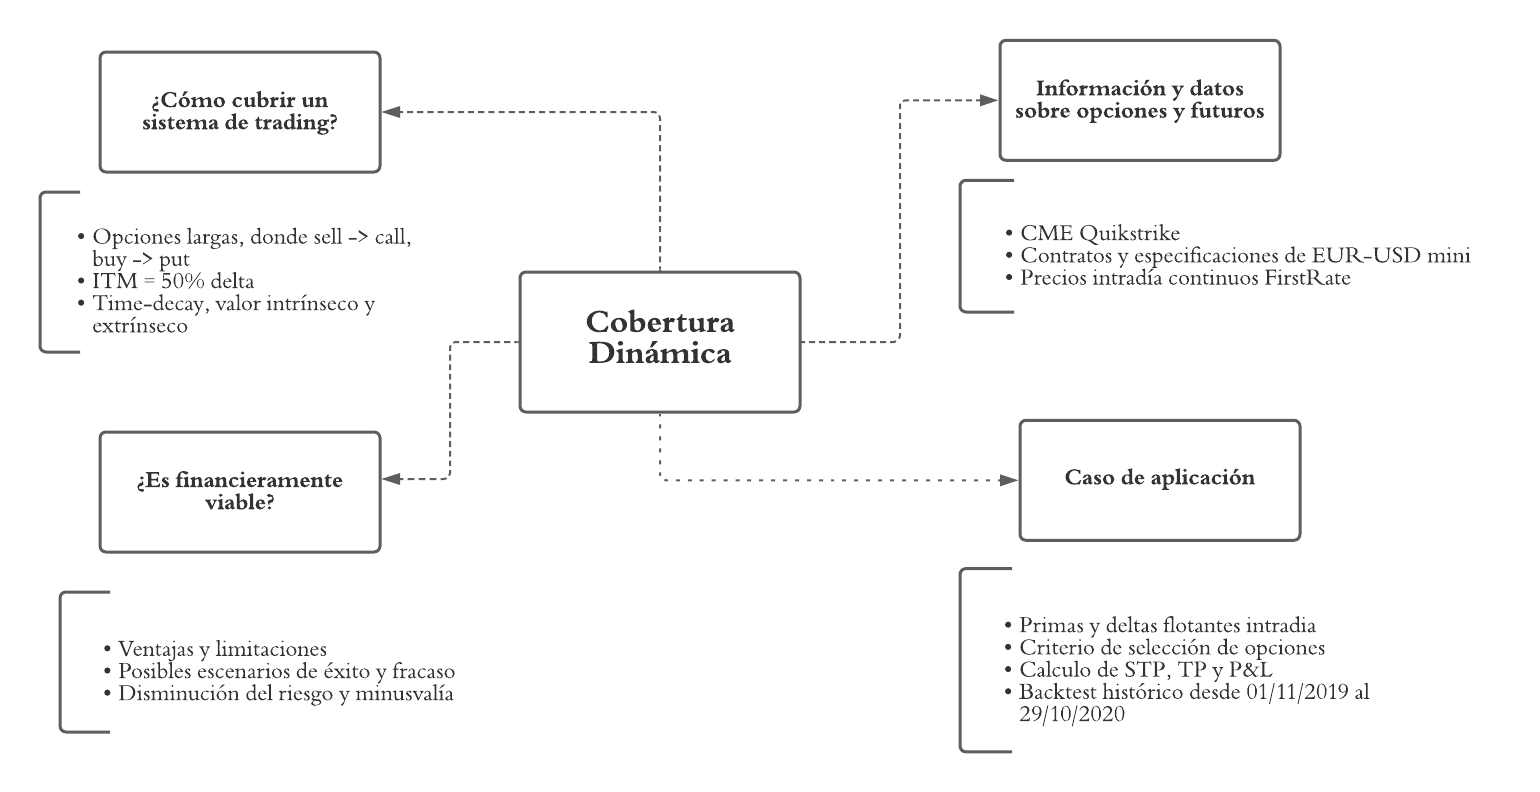

# Metodología
---
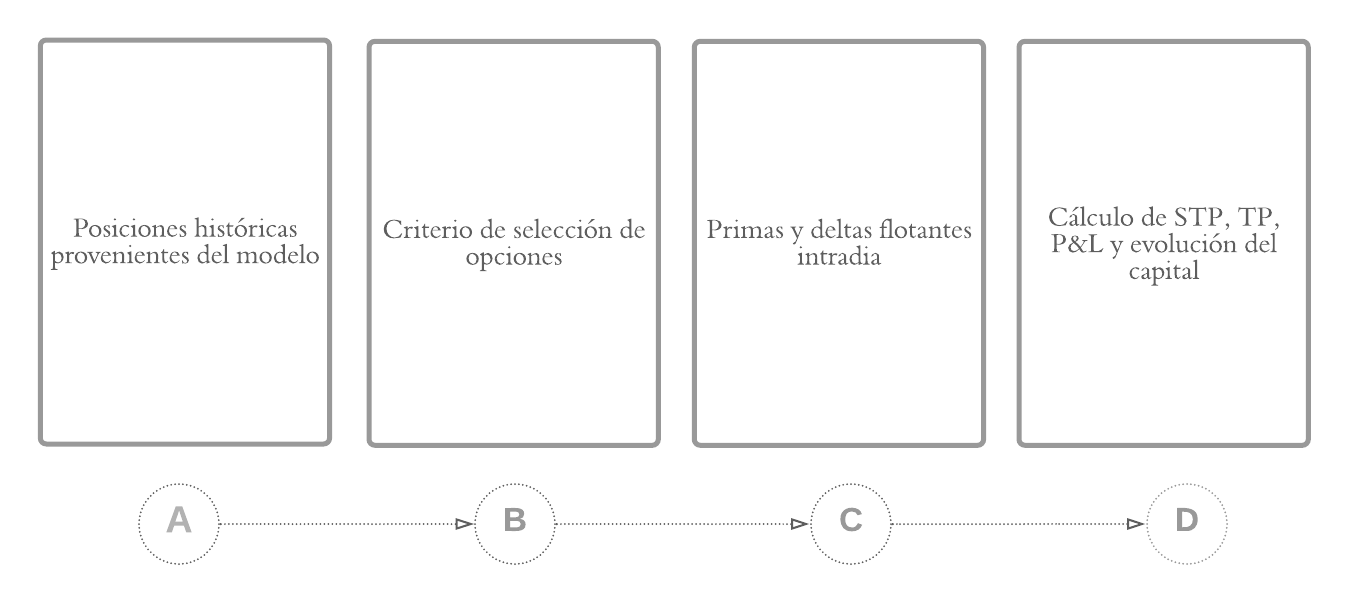

In [9]:
# Liberías
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import time
import matplotlib.dates as mpl_dates
import pandas_datareader.data as web
from IPython.display import display

%matplotlib inline
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)
import scipy.stats as si
import sympy as sy
from sympy.stats import Normal, cdf
from sympy import init_printing
init_printing()

In [2]:
# Display dataframe
def displaydf(dataframe, cols = None, rows = 20):
    with pd.option_context("display.max_columns", cols):
        with pd.option_context("display.max_rows", rows):
            display(dataframe)
    return True

In [4]:
# Importar los datos
backtest = pd.read_excel("EURUSD_Dynamic-Hedging_Historical_Full-Backtest__AJI_WF_v1.xlsx")

In [5]:
Full_backtest = pd.DataFrame()
Full_backtest["TimeStamp"] = backtest["TimeStamp"]
Full_backtest["Open"] = backtest["O"]
Full_backtest["Close"] = backtest["C"]
Full_backtest["Position"] = backtest["Position"]
Full_backtest["Status"] = backtest["Status"]
Full_backtest["Option"] = backtest["Option"]
Full_backtest["Delta"] = backtest["Delta"]
Full_backtest["Prime ($)"] = backtest["Prime $"]
Full_backtest["P&L Opt"] = backtest["P&L Opt"]
Full_backtest["P&L Fut"] = backtest["P&L Fut"]
Full_backtest["Balance Hedged"] = backtest["Full Balance Hedged"]
Full_backtest["Balance Exposed"] = backtest["Full Balance Exposed"]
Full_backtest = Full_backtest.set_index('TimeStamp')

### Backtesting
---

In [6]:
displaydf(Full_backtest)

,Open,Close,Position,Status,Option,Delta,Prime ($),P&L Opt,P&L Fut,Balance Hedged,Balance Exposed
TimeStamp,,,,,,,,,,,
2018-11-05 00:01:00,1.192,1.192,sell,Going,call,0.529,10537.773,0.000,0.0,0.000,0.0
2018-11-05 00:04:00,1.192,1.192,sell,Going,call,0.532,10643.821,106.047,-100.0,6.047,-100.0
2018-11-05 00:05:00,1.192,1.192,sell,Going,call,0.532,10643.821,106.047,-100.0,6.047,-100.0
2018-11-05 00:06:00,1.192,1.192,sell,Going,call,0.532,10643.821,106.047,-100.0,6.047,-100.0
2018-11-05 00:07:00,1.192,1.192,sell,Going,call,0.535,10750.522,212.748,-200.0,12.748,-200.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-29 23:51:00,1.170,1.170,sell,TP,call,0.261,2729.156,-4957.212,6300.0,89499.369,-36000.0
2020-10-29 23:52:00,1.170,1.170,sell,TP,call,0.261,2729.156,-4957.212,6300.0,89499.369,-36000.0
2020-10-29 23:53:00,1.170,1.170,sell,TP,call,0.258,2677.272,-5009.096,6400.0,89499.369,-36000.0


True

### Backtesting
---

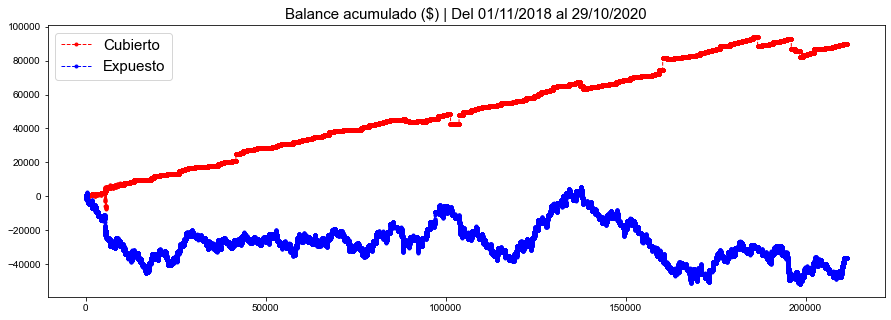

In [7]:
plt.figure(figsize=(15, 5))
ax=plt.axes()
plt.plot(backtest["Full Balance Hedged"], lw=1,color="red",linestyle="--", label='Cubierto', marker='.', alpha=5)
plt.plot(backtest["Full Balance Exposed"], lw=1, color="blue",linestyle="--",label='Expuesto', marker='.', alpha=1)
plt.legend(loc='best', fontsize=15)
plt.title("Balance acumulado ($) | Del 01/11/2018 al 29/10/2020",fontsize=15)
plt.style.use("seaborn-darkgrid")
blue, = sns.color_palette("muted", 1)

### Backtesting
---

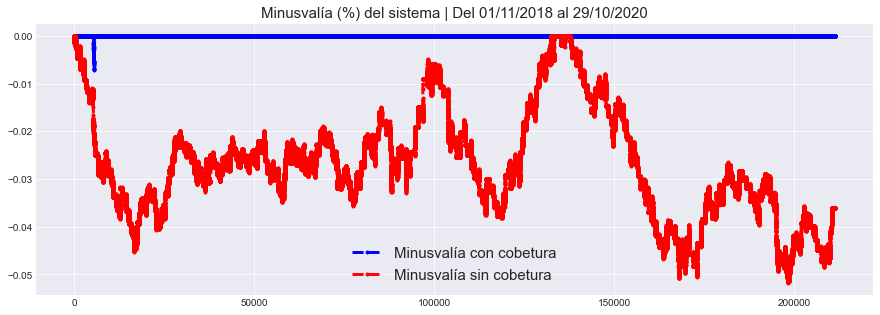

In [8]:
plt.figure(figsize=(15, 5))
ax=plt.axes()
plt.plot(backtest["Drawdown Hedged"], lw=3,color="blue",linestyle="--", label='Minusvalía con cobetura', marker='.', alpha=5)
plt.plot(backtest["Drowdawn Exposed"], lw=3,color="red",linestyle="--", label='Minusvalía sin cobetura', marker='.', alpha=5)
plt.legend(loc='best', fontsize=15)
plt.title("Minusvalía (%) del sistema | Del 01/11/2018 al 29/10/2020",fontsize=15)
plt.style.use("seaborn-darkgrid")
blue, = sns.color_palette("muted", 1)

### Limitaciones 

1. Emparejamiento y tiempo de vencimiento de las opciones
3. Ganancias limitadas con cobertura Vs. Ganancias ilimitadas sin cobertura

### Ventajas

1. Se proje el capital y se acumulan las ganancias
2. Se pueden generar tambien ganancias con las primas
3. Se reduce el riesgo y drawdown del sistema

***
## Conclusiones 
***
La creación del sistema de trading fue todo un reto, desde la obtención de datos, los modelos, cobertura y poder visualizar el impacto.

Si se incorporara el sistema haría una mejora del capital de las personas que cotizan en Afore, pero si se agrega la cobertura el impacto positivo podría ser inmenso en estas cuentas de inversión.


## Gracias 
***

Para consultas se puede visitar el repositorio colaborativo:

https://github.com/IteraCapital